# Esame di SQ
 
Referenze:

- https://www.youtube.com/watch?v=-o3AxdVcUtQ (setup)

- https://www.youtube.com/watch?v=zxOYp7hUtwk (esempi di analisi)

- https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/


In [14]:
import numpy as np
import pandas as pd
import seaborn as sn
import pathlib
import os
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from numpy import cov

In [2]:
directory = pathlib.Path().absolute()
path = os.path.join(directory, 'dataset.csv')
data = pd.read_csv(path)

# **_1 - Understand the data_**

In [3]:
data.head()

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,ant,1.7,org.apache.tools.ant.taskdefs.rmic.RmicAdapter...,3,1,0,10,18,3,1,...,0.0,0,0.0,0.444444,0,0,32.666667,1,0.6667,0
1,ant,1.7,org.apache.tools.ant.taskdefs.optional.perforc...,5,2,0,4,13,0,1,...,1.0,1,0.7,0.500000,0,0,13.400000,1,0.6000,0
2,ant,1.7,org.apache.tools.ant.taskdefs.optional.junit.O...,1,2,0,1,3,0,0,...,0.0,0,1.0,1.000000,0,0,6.000000,0,0.0000,0
3,ant,1.7,org.apache.tools.ant.taskdefs.optional.perforc...,8,1,9,13,20,12,9,...,0.2,1,0.0,0.406250,0,0,11.000000,1,0.8750,0
4,ant,1.7,org.apache.tools.ant.taskdefs.WaitFor,9,3,0,5,26,16,0,...,1.0,0,0.8,0.388889,0,0,19.000000,2,1.0000,1


In [4]:
data.describe()

,version,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1.700000e+00,11.071141,2.522148,0.731544,11.046980,34.362416,89.147651,5.655034,5.746309,8.365101,...,0.644855,0.726174,0.509968,0.474685,0.720805,1.312752,23.640870,4.669799,1.366053,0.453691
std,2.377473e-14,11.975963,1.398869,4.800357,26.343149,36.024972,349.937555,25.814223,5.653176,9.331319,...,0.438138,1.426581,0.398696,0.259931,0.938948,2.332602,76.986079,6.276853,0.881739,1.138673
min,1.700000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000e+00,4.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.269841,0.000000,0.000000,9.066667,1.000000,0.857100,0.000000
50%,1.700000e+00,7.000000,2.000000,0.000000,6.000000,23.000000,6.000000,1.000000,4.000000,6.000000,...,1.000000,0.000000,0.681818,0.437500,0.000000,0.000000,16.400000,3.000000,1.142900,0.000000
75%,1.700000e+00,14.000000,4.000000,0.000000,11.000000,43.000000,53.000000,4.000000,8.000000,10.000000,...,1.000000,1.000000,0.869919,0.666667,1.000000,2.000000,28.000000,6.000000,1.666700,0.000000
max,1.700000e+00,120.000000,7.000000,102.000000,499.000000,288.000000,6692.000000,498.000000,37.000000,103.000000,...,1.000000,11.000000,1.000000,1.000000,5.000000,19.000000,2052.000000,53.000000,6.777800,10.000000


_1.1 data size_

In [6]:
data.shape

(745, 24)

_1.2 colums name_

In [7]:
data.columns

Index(['name', 'version', 'name.1', 'wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom',
       'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic',
       'cbm', 'amc', 'max_cc', 'avg_cc', 'bug'],
      dtype='object')

_1.3 count unique value_

In [8]:
data.nunique()

name         1
version      1
name.1     745
wmc         58
dit          7
noc         18
cbo         57
rfc        133
lcom       195
ca          47
ce          33
npm         46
lcom3      289
loc        414
dam         66
moa         11
mfa        241
cam        273
ic           6
cbm         18
amc        520
max_cc      35
avg_cc     234
bug         10
dtype: int64

In [9]:
data['bug'].unique()

array([ 0,  1,  3,  2,  6,  4,  8,  5, 10,  7], dtype=int64)

_1.4 Check integrity_

In [10]:
data.isnull().sum()

name       0
version    0
name.1     0
wmc        0
dit        0
noc        0
cbo        0
rfc        0
lcom       0
ca         0
ce         0
npm        0
lcom3      0
loc        0
dam        0
moa        0
mfa        0
cam        0
ic         0
cbm        0
amc        0
max_cc     0
avg_cc     0
bug        0
dtype: int64

<AxesSubplot:>

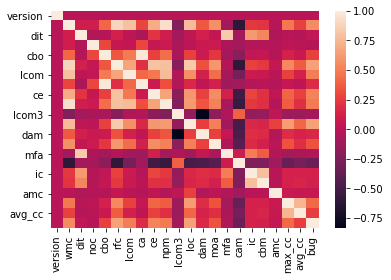

In [11]:
correlation_all_matrix = data.corr()
sn.heatmap(correlation_all_matrix)

In [12]:
print(np.around(correlation_all_matrix,3))

         version    wmc    dit    noc    cbo    rfc   lcom     ca     ce  \
version      1.0  0.000 -0.000  0.000  0.000  0.000 -0.000  0.000  0.000   
wmc          0.0  1.000  0.104  0.107  0.411  0.888  0.793  0.287  0.702   
dit         -0.0  0.104  1.000 -0.032 -0.017  0.123  0.021 -0.067  0.213   
noc          0.0  0.107 -0.032  1.000  0.291  0.054  0.041  0.291  0.053   
cbo          0.0  0.411 -0.017  0.291  1.000  0.351  0.486  0.980  0.271   
rfc          0.0  0.888  0.123  0.054  0.351  1.000  0.664  0.203  0.806   
lcom        -0.0  0.793  0.021  0.041  0.486  0.664  1.000  0.418  0.478   
ca           0.0  0.287 -0.067  0.291  0.980  0.203  0.418  1.000  0.078   
ce           0.0  0.702  0.213  0.053  0.271  0.806  0.478  0.078  1.000   
npm          0.0  0.936  0.110  0.080  0.435  0.787  0.776  0.322  0.656   
lcom3       -0.0 -0.229 -0.097 -0.060 -0.068 -0.211 -0.046 -0.031 -0.189   
loc         -0.0  0.777  0.026  0.017  0.267  0.839  0.573  0.157  0.607   
dam         

# **_2 - Select 4 features_**

Metrics used 
https://core.ac.uk/download/pdf/185520882.pdf

Takes 4 features
- best for bug = ['rfc','loc','wmc','ce','bug']

In [13]:
features_list = ['rfc','loc','wmc','ce','bug']
drop_list = []

for current_features in data.columns:
    if not current_features in features_list:
        drop_list.append(current_features)
        
data = data.drop(drop_list, axis=1)        
data.shape

(745, 5)

In [14]:
data.head()

,wmc,rfc,ce,loc,bug
0,3,18,9,106,0
1,5,13,4,76,0
2,1,3,1,7,0
3,8,20,4,101,0
4,9,26,5,185,1


# **_3 - Relationship analysis_**

_3.1 Correlation matrix_

<AxesSubplot:>

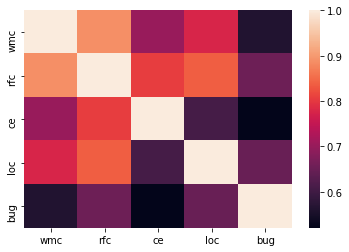

In [15]:
correlation = data.corr()
sn.heatmap(correlation)

## 2.3.1 single variable: RFC

Response For a Class (RFC)
cardinality of the set of methods that can potentially be executed in response to a message received by an object of the class

Type: ordinal

In [26]:
data['rfc'].describe()

count    745.000000
mean      34.362416
std       36.024972
min        0.000000
25%       11.000000
50%       23.000000
75%       43.000000
max      288.000000
Name: rfc, dtype: float64

<AxesSubplot:xlabel='rfc', ylabel='Count'>

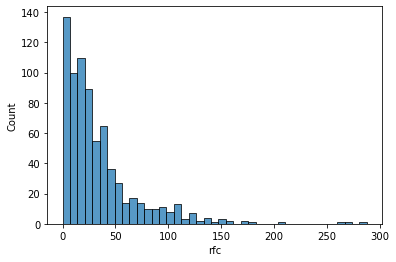

In [16]:
sn.histplot(data['rfc'])

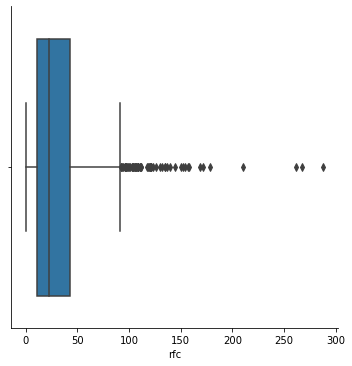

In [11]:
sn.catplot(x='rfc', kind='box', data=data)

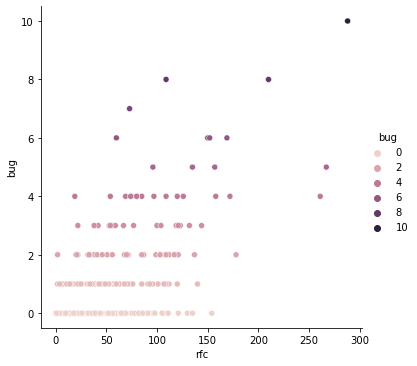

In [100]:
sn.relplot(x='rfc', y='bug', hue='bug',data=data)

In [18]:
np.around(np.corrcoef(data['bug'], data['rfc'])[0,1],3)

0.654

In [25]:
covariance = cov(data['bug'], data['rfc'])
print(covariance)

[[1.29657574e+00 2.68071282e+01]
 [2.68071282e+01 1.29779859e+03]]


Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution. The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

In [9]:
print(np.around(pearsonr(data['bug'], data['rfc']),4))

[0.6535 0.    ]


### KMeans:
- https://datatofish.com/k-means-clustering-python/

centroids
[[ 13   0]
 [ 44   0]
 [ 99   1]
 [193   5]]


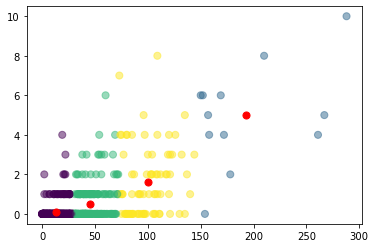

In [99]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

new_data_frame = {'x': data['rfc'],'y': data['bug']}
  
df = DataFrame(new_data_frame,columns=['x','y'])
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print("centroids")
array_int = np.array(centroids, dtype='int')
print(np.sort(array_int,axis=0))

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

### Implementing Linear Regression
- https://realpython.com/linear-regression-in-python/

coefficient of determination: 0.42706639041149486
intercept: -0.25609351189236623
slope: 0.02065584634218019


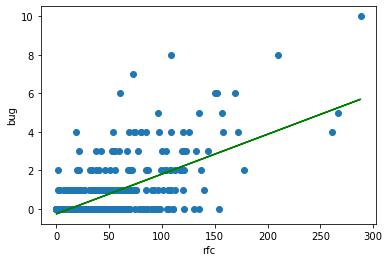

In [114]:
from sklearn.linear_model import LinearRegression
x = np.array(data['rfc']).reshape((-1, 1))
y = np.array(data['bug'])
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_[0])

plt.scatter(x, y)
plt.xlabel("rfc")
plt.ylabel("bug")
plt.plot(data['rfc'], model.predict(x), color = 'g')

plt.show()


### Outlier detection - percentile
- https://www.youtube.com/watch?v=7sJaRHF03K8

In [135]:
max_thresold = data["rfc"].quantile(0.95)
max_thresold

107.79999999999995

In [146]:
min_thresold = data["rfc"].quantile(0.05)
min_thresold

2.0

In [152]:
outlier_max = data["rfc"]> max_thresold
outlier_min = data["rfc"]< min_thresold
new_data_frame = pd.DataFrame({'rfc': data["rfc"], 'bug': data["bug"], "outlier_max": outlier_max, "outlier_min": outlier_min})
new_data_frame = new_data_frame[new_data_frame['outlier_max'] == 0]
new_data_frame = new_data_frame[new_data_frame['outlier_min'] == 0]
print(new_data_frame)

     rfc  bug  outlier_max  outlier_min
0     18    0        False        False
1     13    0        False        False
2      3    0        False        False
3     20    0        False        False
4     26    1        False        False
..   ...  ...          ...          ...
739   11    0        False        False
741   10    0        False        False
742   26    0        False        False
743   34    1        False        False
744   18    0        False        False

[670 rows x 4 columns]


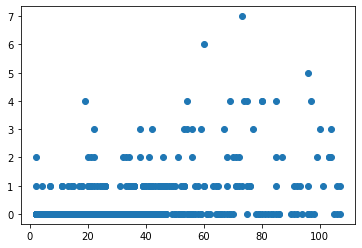

In [153]:
plt.scatter(new_data_frame["rfc"], new_data_frame["bug"])

In [126]:
outlier_1 = data["rfc"] > max_thresold
outlier_1
outlier_2 = data["rfc"] <= max_thresold
outlier_2

print(np.count_nonzero(outlier_1))
print(np.count_nonzero(outlier_2))

38
707


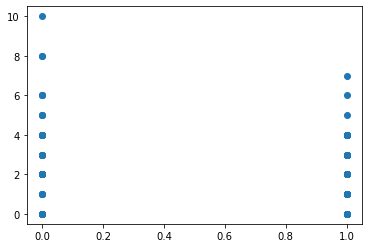

## _2.3.2 single variables - loc_

Source lines of code (LOC) is a software metric used to measure the size of a computer program by counting the number of lines in the text of the program's source code.Source lines of code (LOC) is a software metric used to measure the size of a computer program by counting the number of lines in the text of the program's source code.

<AxesSubplot:xlabel='loc', ylabel='Count'>

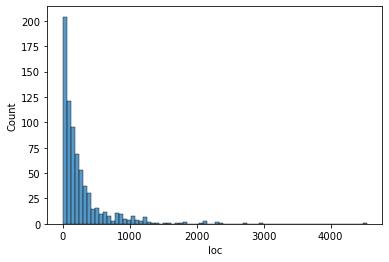

In [17]:
sn.histplot(data['loc'])

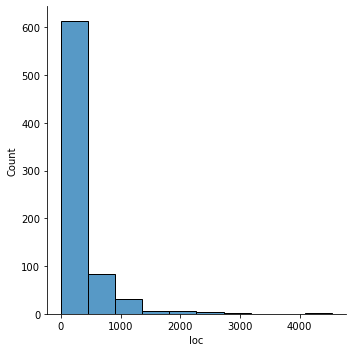

In [18]:
sn.displot(data['loc'], bins=10)

_2.3.2 single variables - wmc_

Weighted Methods per Class (WMC)
sum of the complexities of the methods of the class

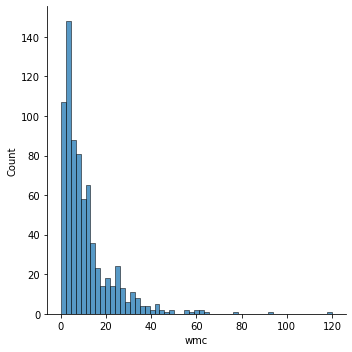

In [19]:
sn.displot(data['wmc'])

_2.3.4 single variables - ce_

Efferent coupling is a coupling metric in software development. It measures the number of data types a class knows about. This includes inheritance, interface implementation, parameter types, variable types, and exceptions. 

<AxesSubplot:xlabel='ce', ylabel='Count'>

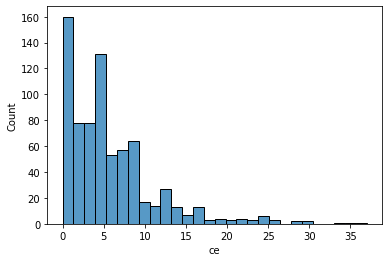

In [20]:
sn.histplot(data['ce'])

_2.3.5 single variables - bug_

A software bug is an error, flaw or fault in a computer program or system that causes it to produce an incorrect or unexpected result, or to behave in unintended ways

<AxesSubplot:xlabel='bug', ylabel='Count'>

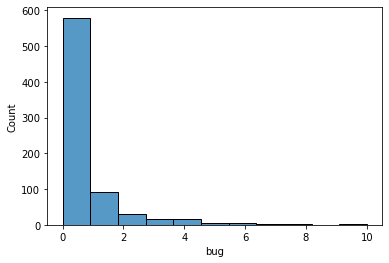

In [21]:
sn.histplot(data['bug'])

#todo aggiungere grafici a torta

_2.2 pairplot_

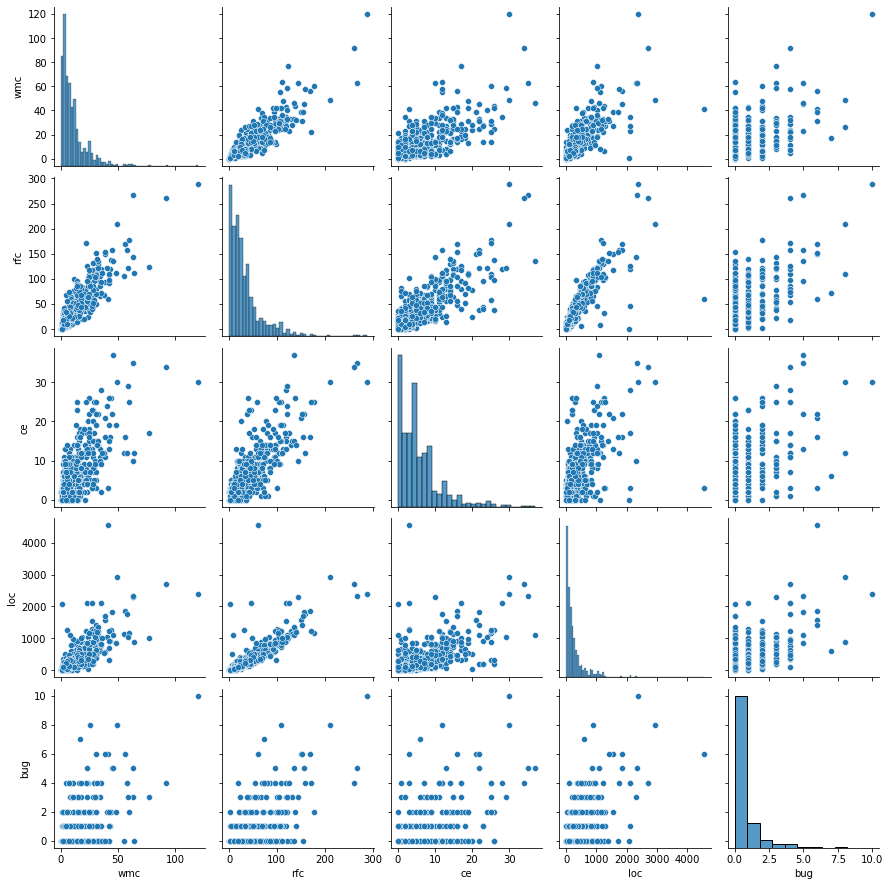

In [22]:
sn.pairplot(data)

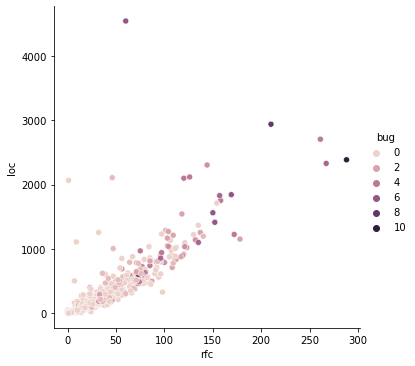

In [25]:
sn.relplot(x='rfc', y='loc', hue='bug',data=data)

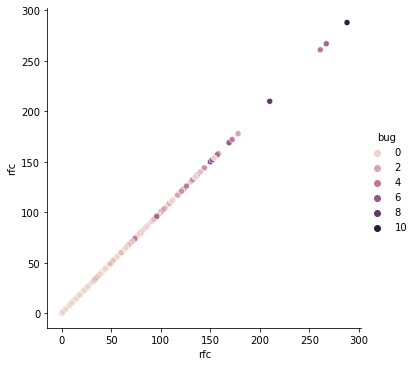

In [27]:
sn.relplot(x='rfc', y='rfc', hue='bug',data=data)

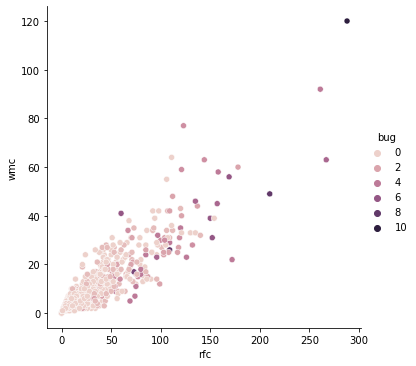

In [28]:
sn.relplot(x='rfc', y='wmc', hue='bug',data=data)

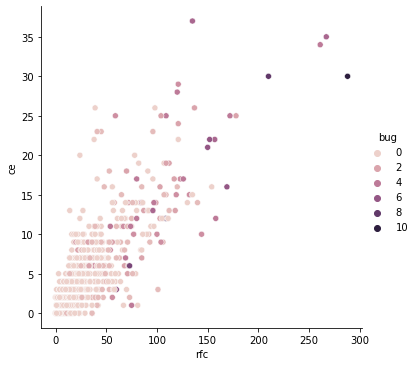

In [29]:
sn.relplot(x='rfc', y='ce', hue='bug',data=data)

_bug vs independent variables diagrams_

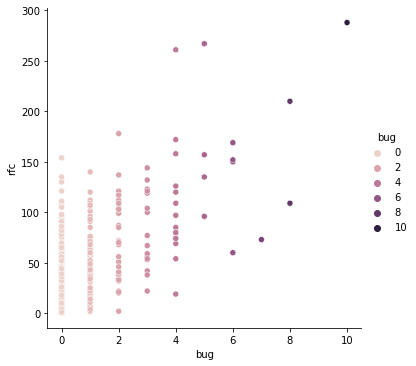

In [31]:
sn.relplot(x='bug', y='rfc', hue='bug',data=data)

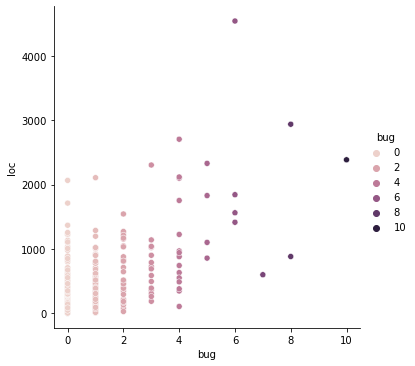

In [33]:
sn.relplot(x='bug', y='loc', hue='bug',data=data)

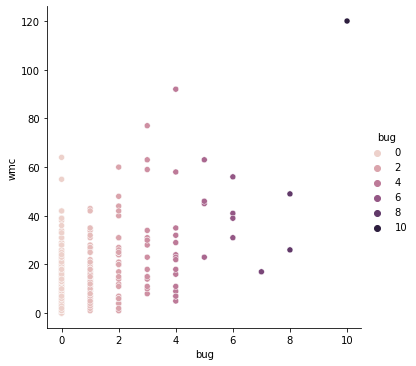

In [34]:
sn.relplot(x='bug', y='wmc', hue='bug',data=data)

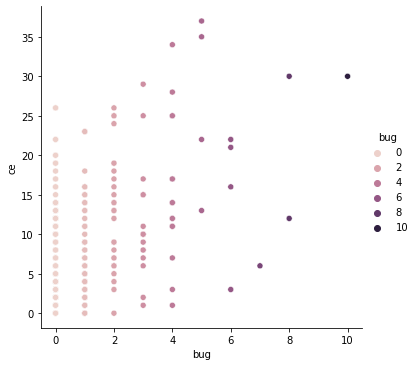

In [35]:
sn.relplot(x='bug', y='ce', hue='bug',data=data)

**_4 Only bugs_**

In [ ]:
only_bug = data.query('bug > 0')
only_bug.shape

In [ ]:
sn.pairplot(only_bug)

sn.catplot(x='loc', kind='box', data=data)